In [1]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [31]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

In [145]:
data=pd.read_csv("0705_2.csv")

interaction_array=np.array(data['interactions'])
interaction_with_array=np.array(data['target_obj'])
action_array=np.array(data['action'])

In [146]:
data

,time,x,y,action,interactions,target_obj
0,51:10.2,119,293,walking,none,none
1,51:10.5,156,305,walking,none,none
2,51:10.8,176,293,walking,none,none
3,51:11.0,226,294,walking,none,none
4,51:11.3,254,297,walking,none,none
...,...,...,...,...,...,...
617,54:06.1,155,57,walking,none,none
618,54:06.5,126,80,walking,none,none
619,54:06.8,92,104,walking,none,none
620,54:07.1,60,129,walking,none,none


In [155]:
data = data[(data['action'] != 'walking') | (data['interactions'] != 'none')]

In [154]:
data[data['action'] == 'laying']

,time,x,y,action,interactions,target_obj
302,52:28.6,51,318,laying,none,none
303,52:28.9,43,336,laying,none,none
304,52:29.1,40,358,laying,none,none
305,52:29.4,43,365,laying,none,none
308,52:30.2,40,413,laying,none,none
...,...,...,...,...,...,...
390,52:53.7,67,396,laying,none,none
391,52:53.9,67,396,laying,none,none
392,52:54.3,65,381,laying,none,none
393,52:54.5,30,484,laying,none,none


In [156]:
data2=data.loc[:,['x','y']]

In [157]:
data2

,x,y
9,377,213
12,386,201
13,389,196
14,387,207
15,399,207
...,...,...
606,549,5
607,511,12
608,445,22
609,416,27


In [158]:
data3 = [list(e) for e in zip(data['x'],data['y'])]

In [159]:
data3

[[377, 213],
 [386, 201],
 [389, 196],
 [387, 207],
 [399, 207],
 [401, 212],
 [409, 213],
 [401, 216],
 [394, 214],
 [399, 199],
 [390, 211],
 [387, 216],
 [389, 213],
 [397, 208],
 [397, 212],
 [422, 182],
 [415, 186],
 [410, 190],
 [403, 195],
 [395, 200],
 [416, 186],
 [396, 200],
 [388, 213],
 [401, 205],
 [395, 212],
 [393, 213],
 [399, 205],
 [395, 209],
 [391, 211],
 [402, 195],
 [400, 197],
 [401, 196],
 [391, 209],
 [391, 209],
 [394, 204],
 [393, 205],
 [386, 209],
 [384, 210],
 [395, 208],
 [395, 208],
 [389, 213],
 [388, 217],
 [396, 216],
 [400, 219],
 [401, 214],
 [405, 212],
 [408, 210],
 [407, 211],
 [390, 218],
 [373, 234],
 [372, 244],
 [363, 245],
 [365, 249],
 [300, 309],
 [307, 329],
 [308, 333],
 [317, 317],
 [317, 309],
 [313, 302],
 [317, 298],
 [314, 294],
 [318, 299],
 [322, 307],
 [321, 303],
 [314, 300],
 [316, 304],
 [319, 305],
 [314, 306],
 [317, 302],
 [318, 296],
 [318, 310],
 [319, 310],
 [315, 305],
 [318, 311],
 [322, 315],
 [321, 307],
 [316, 303],

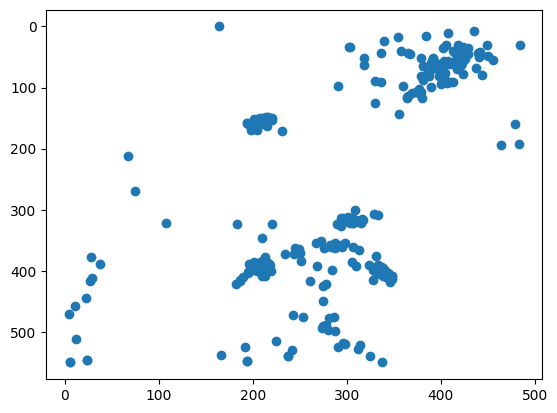

In [160]:
# data=pd.read_csv("20230623.csv")
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(data.loc[:, ['y']], data.loc[:, ['x']])

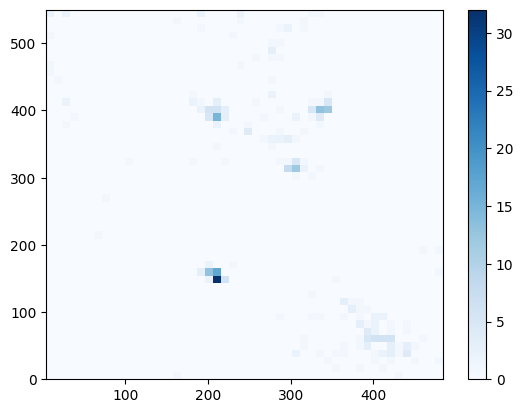

In [161]:
# data=pd.read_csv("20230623.csv")
plt.hist2d(data['y'], data['x'], bins=50, cmap='Blues')
plt.colorbar()
plt.show()

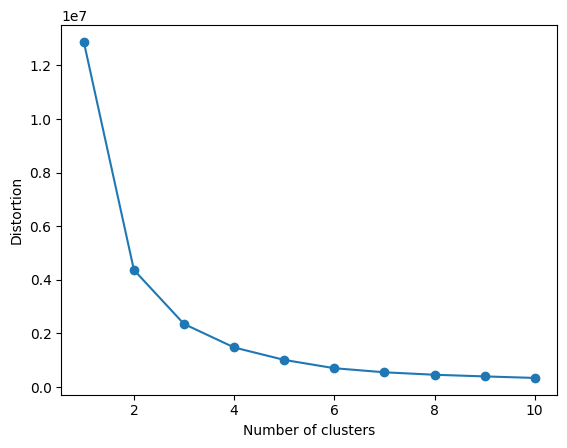

In [162]:
#elbow
distortions = []

for i in range(1,11):                 
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data3)                        
    distortions.append(km.inertia_)   

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [163]:
N=4

In [164]:
km = KMeans(n_clusters=N, random_state=42)
label = km.fit_predict(data2[:])

In [165]:
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

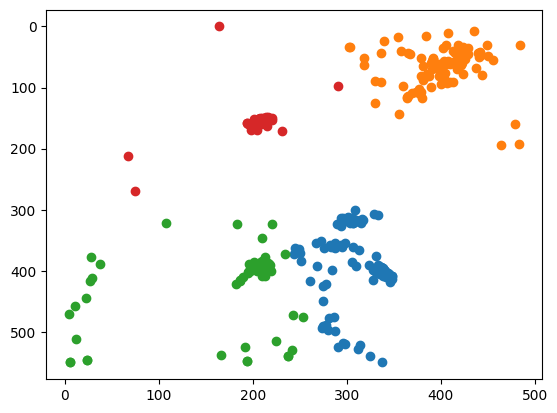

In [166]:
plt.gca().invert_yaxis()  # y軸を反転する
for i in range(N):
    plt.scatter(data.loc[:, ['y']][label==i], data.loc[:, ['x']][label==i])
# plt.scatter(data.loc[:, ['z']][label==0], data.loc[:, ['x']][label==0])
# plt.scatter(data.loc[:, ['z']][label==1], data.loc[:, ['x']][label==1])
# plt.scatter(data.loc[:, ['z']][label==2], data.loc[:, ['x']][label==2])
# plt.scatter(data.loc[:, ['z']][label==3], data.loc[:, ['x']][label==3])
plt.show()

In [167]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

[0.47790504, 0.32820922, 0.3649258, 0.29677573]
[nan, nan, nan, nan]


/Users/haruhiro/opt/anaconda3/envs/mp4/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/haruhiro/opt/anaconda3/envs/mp4/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[nan, nan, nan, nan]
[0.37746528, 0.34955856, 0.50677896, 0.25585413]


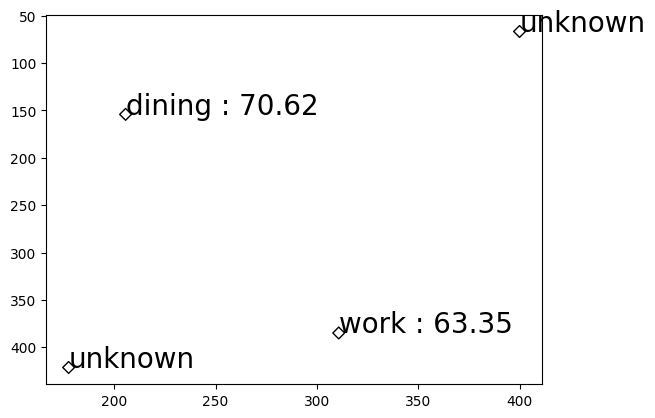

In [168]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

observedList1 =[]
for i in ddList1:
    if(interaction_array[i]!="none"):
        observedList1.append(interaction_array[i])
        if(action_array[i]=="laying"):
            observedList1.append(action_array[i])
        observedList1.append(interaction_with_array[i])

observedList2 =[]
for i in ddList2:
    if(interaction_array[i]!="none"):
        if(action_array[i]=="laying"):
            observedList2.append(action_array[i])
        observedList2.append(interaction_array[i])
        observedList2.append(interaction_with_array[i]) 

observedList3 =[]
for i in ddList3:
    if(interaction_array[i]!="none"):
        if(action_array[i]=="laying"):
            observedList3.append(action_array[i])
        observedList3.append(interaction_array[i])
        observedList3.append(interaction_with_array[i])

observedList4 =[]
for i in ddList4:
    if(interaction_array[i]!="none"):
        if(action_array[i]=="laying"):
            observedList4.append(action_array[i])
        observedList4.append(interaction_array[i])
        observedList4.append(interaction_with_array[i])

split_values = []
original_values = []
for item in observedList1:
    split_items = item.split(',')
    split_values.extend(split_items)
    original_values.extend([item] * len(split_items))

split_values2 = []
original_values2 = []
for item in observedList2:
    split_items = item.split(',')
    split_values2.extend(split_items)
    original_values2.extend([item] * len(split_items))

split_values3 = []
original_values3 = []
for item in observedList3:
    split_items = item.split(',')
    split_values3.extend(split_items)
    original_values3.extend([item] * len(split_items))

split_values4 = []
original_values4 = []
for item in observedList4:
    split_items = item.split(',')
    split_values4.extend(split_items)
    original_values4.extend([item] * len(split_items))

centers = km.cluster_centers_
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(centers[:, 1], centers[:, 0], marker="D", facecolors='none', edgecolors='black')
observed_lists = [split_values, split_values2, split_values3, split_values4]
utilization_class_list = ['work','rest','dining','read']
utilization = 'none'

for i, observed_list in enumerate(observed_lists):
    score = [np.mean([model.similarity(utilization, observe) for observe in observed_list]) 
             for utilization in utilization_class_list]
    max_socre = np.max(score)

    similar_list = model.most_similar(f"{utilization}")
    most_similar_score =similar_list[0][1]
    prob = max_socre / most_similar_score *100

    max_index = np.argmax(score)
    print(score)
    utilization = utilization_class_list[max_index]
    if prob>50:
        plt.text(centers[i][1], centers[i][0], f"{utilization} : {round(prob, 2)}", fontsize=20)
    else:
        plt.text(centers[i][1], centers[i][0], f"unknown", fontsize=20)


In [144]:
similar_list = model.most_similar('work')
for similar_set in similar_list:
    print(str(similar_set[0])+ " : " + str(similar_set[1]))

works : 0.717581570148468
working : 0.6682043671607971
job : 0.6681519746780396
Work : 0.642331063747406
work. : 0.6332440972328186
research : 0.6295222640037537
work- : 0.6242907047271729
doing : 0.6225779056549072
effort : 0.6146255731582642
work-- : 0.6137425303459167


In [38]:
wordsList = ["keyboard", "cellphone", "bottle", "book", "carpet", "cushion", "food", "sitting", "standing", "walking", "drinking", "reading", "calling", "working", "holding", "laying", "eating"]
for words in wordsList:
    print(f'{words}',model.similarity('rest', f'{words}'))

keyboard 0.31203625
cellphone 0.25265887
bottle 0.33842653
book 0.3641611
carpet 0.2568283
cushion 0.38140517
food 0.35949716
sitting 0.43288422
standing 0.42370832
walking 0.3849271
drinking 0.32320073
reading 0.39848146
calling 0.31895646
working 0.37415615
holding 0.35244563
laying 0.50218946
eating 0.36787632


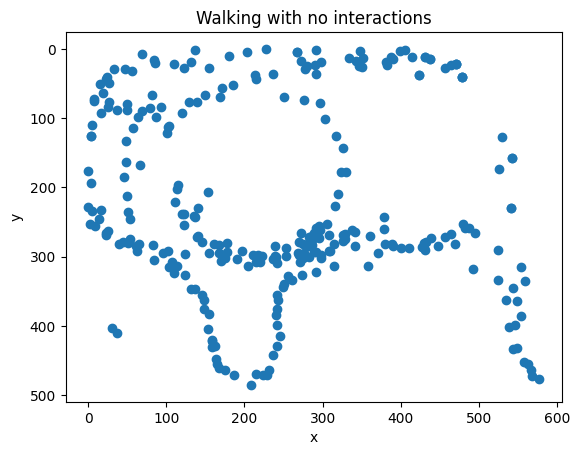

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('0705_1.csv')

# 条件に合致する行を抽出する
filtered_df = df[(df['action'] == 'walking') & (df['interactions'] == 'none')]

# x列とy列を取得
x_values = filtered_df['x']
y_values = filtered_df['y']

# プロット
plt.scatter(x_values, y_values)
plt.gca().invert_yaxis()  # y軸を反転する
plt.xlabel('x')
plt.ylabel('y')
plt.title('Walking with no interactions')
plt.show()
